# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the datasets into pandas dataframe

In [2]:
# mount drive and read csv file
dfads = pd.read_csv("Advertising.csv")
type(dfads)

pandas.core.frame.DataFrame

In [3]:
dfads.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# drop 'unnamed: 0'column as it is not required for analysis
dfads = dfads.drop(columns=['Unnamed: 0'])

In [5]:
dfads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# display the shape of dataframe
dfads.shape

(200, 4)

In [7]:
# displayinformation about the datatype of each column and null values
dfads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# checking for the null values
dfads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# diaplay basic statistics abou the data
dfads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Correlation Matrix

In [10]:
# compute the correlation matrix
# dfads.corr()
dfads.corr(numeric_only = True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

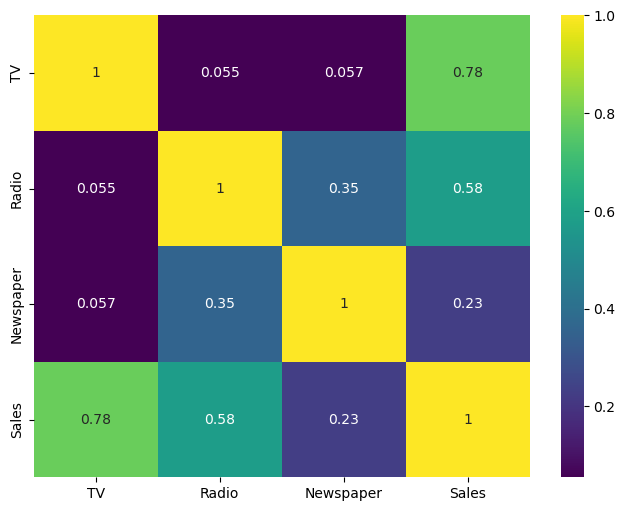

In [11]:
# display the correaltion matrix using a heatmap
corr = dfads.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True, ax=ax, cmap='viridis')

# Data Visualization

In [12]:
# Pairplot

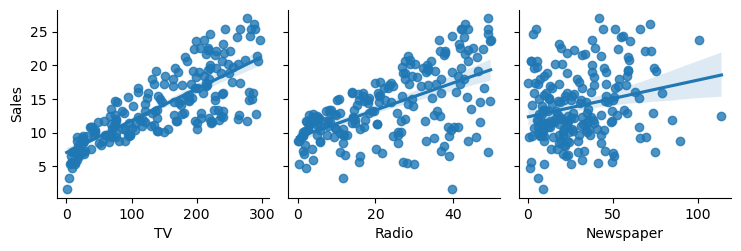

In [13]:
# sactter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Slaes)
sns.pairplot(data= dfads,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg", palette="pastel")

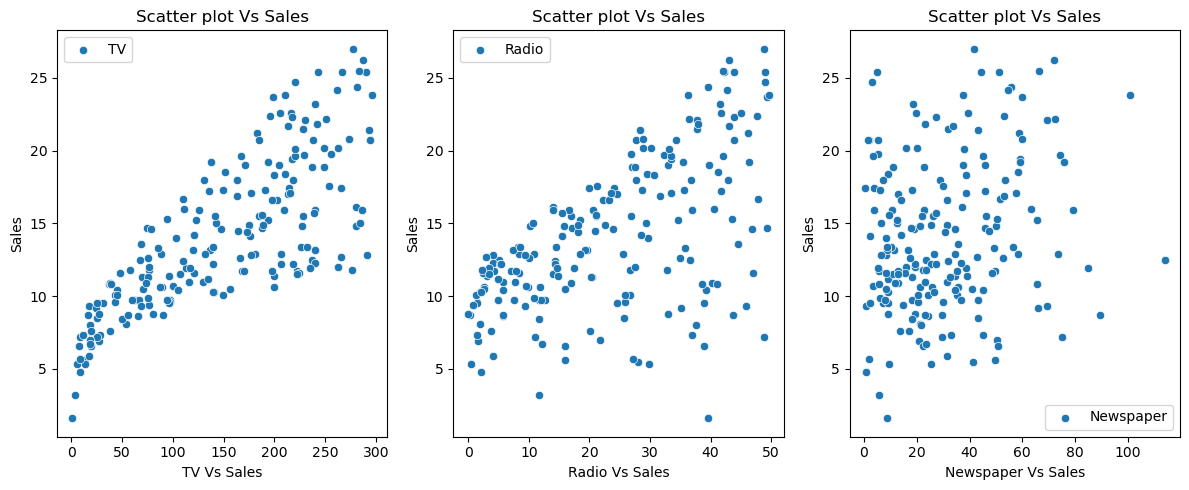

In [14]:
# Scatterplot
plt.figure(figsize=(12,5))

columns = {0:"TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=dfads[col_name], y=dfads["Sales"], label=col_name, palette="pastel")
    plt.xlabel("{} Vs Sales".format(col_name))
    plt.title("Scatter plot Vs Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Distribution plot

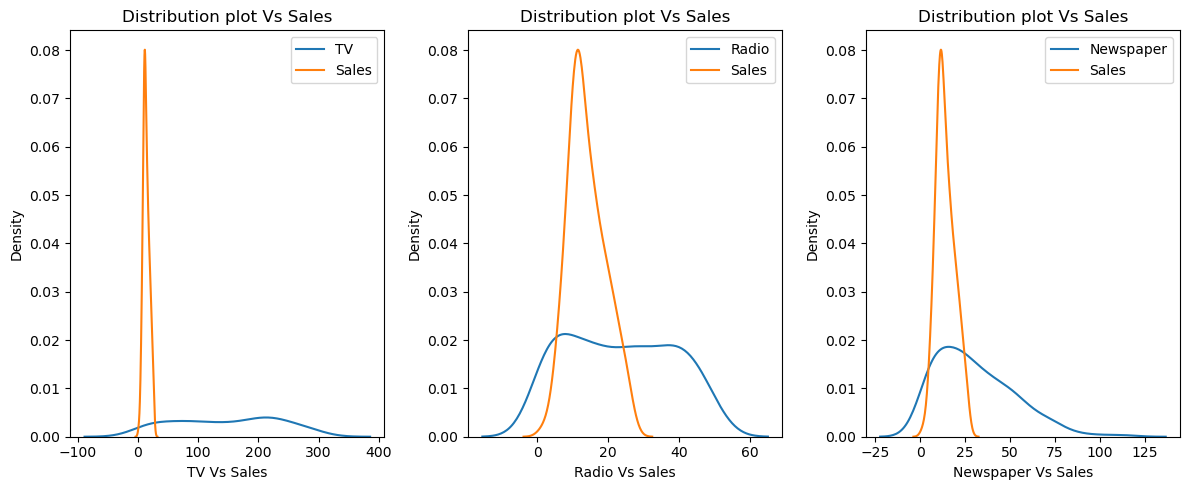

In [16]:
plt.figure(figsize=(12,5))

columns = {0:"TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=dfads[col_name], hist=False, label=col_name)
    sns.distplot(x=dfads["Sales"], hist=False, label= "Sales")
    plt.xlabel("{} Vs Sales".format(col_name))
    plt.title("Distribution plot Vs Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# histrogram plot

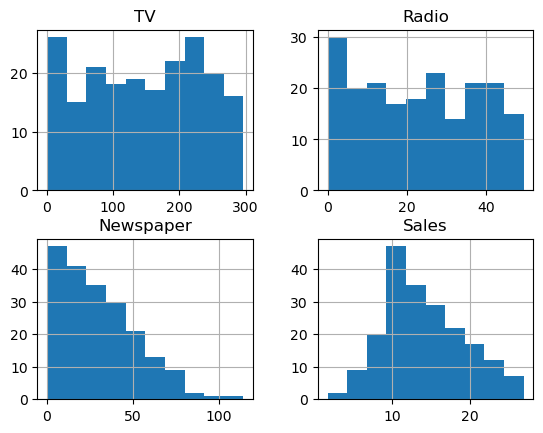

In [18]:
# histogram to check the normality assumption of the dependent variable (Sales)
dfads.hist()
plt.show()

In [19]:
# Linear Regression Plot


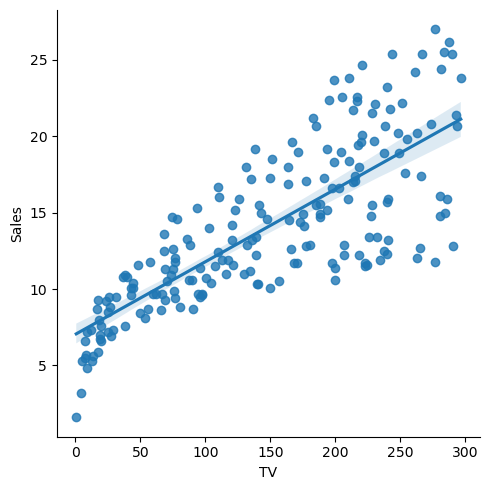

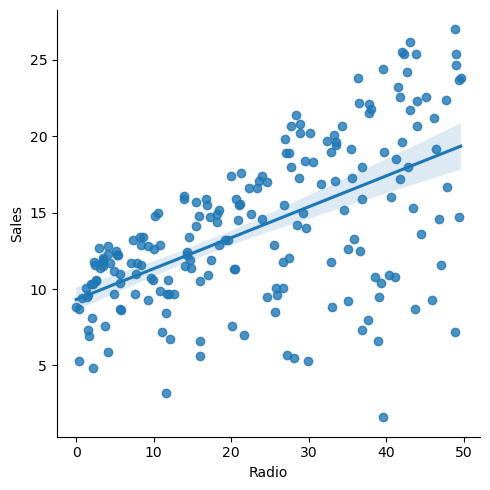

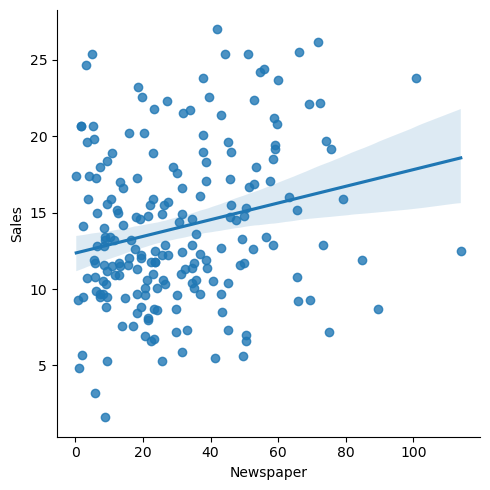

In [20]:
# linear regression plot to visualize the relationship between eeach independent variable & the dependent variable
# plt.figure(figsize=(8, 5))

import seaborn as sns

sns.lmplot(x='TV', y='Sales', data=dfads, height=5)
sns.lmplot(x='Radio', y='Sales', data=dfads, height=5)
sns.lmplot(x='Newspaper', y='Sales', data=dfads, height=5)


In [21]:
dfads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# processing the dataset & model prepration

In [22]:
# checking for null values
dfads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

x = dfads.drop('Sales', axis=1)
y = dfads['Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [24]:
# label encoder
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
lab = LabelEncoder()
y = lab.fit_transform(y)

In [25]:
# standardscalar() standardize feature by removing the mean & sacling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [27]:
print("Accuracy (Linear Regression): ",model.score(x_train, y_train) *100)

Accuracy (Linear Regression):  89.57008271017818


# Lineplot

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [29]:
# mean squared error (MSE) : A measure of the average squared difference between predicted and actual sales values
mse = mean_squared_error(y_test, y_pred)

In [30]:
r2 = r2_score(y_test, y_pred)

In [31]:
cv_scores = cross_val_score(model, x_train,y_train, cv=5, scoring='r2')

Linear Regression
Mean Sqaured Error: 3.1740973539761046
R2 Score: 0.899438024100912
Cross-Validation R2: 0.8594884313276513


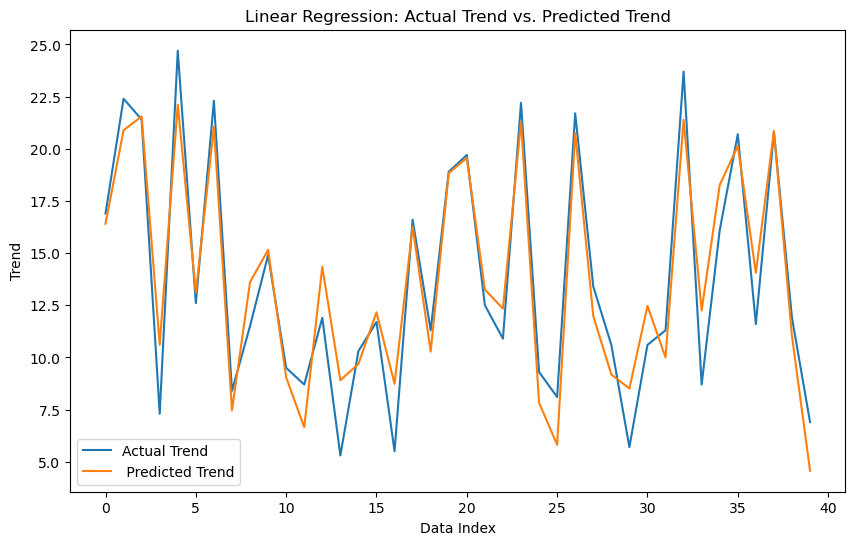

In [35]:
print("Linear Regression")
print("Mean Sqaured Error: {}".format(mse))
print("R2 Score: {}".format(r2))
print("Cross-Validation R2: {}".format(cv_scores.mean()))

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label=' Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title(f'Linear Regression: Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()
print()


# Prediction

In [39]:
# make prediction on new data
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

                    

Predicted Sales: [16.98079966]
